In [1]:
import warnings

import moscot as mt
from moscot.problems.space import AlignmentProblem

import numpy as np
import scanpy as sc
import squidpy as sq
import matplotlib as plt
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd

warnings.simplefilter("ignore", UserWarning)

In [2]:
def select_slide(adata, s, s_col='sample'):
    r""" This function selects the data for one slide from the spatial anndata object.
    :param adata: Anndata object with multiple spatial experiments
    :param s: name of selected experiment
    :param s_col: column in adata.obs listing experiment name for each location
    """
    slide = adata[adata.obs[s_col].isin(s), :]
    s_keys = list(slide.uns['spatial'].keys())
    s_spatial = np.array(s_keys)[[s in k for k in s_keys]][0]
    slide.uns['spatial'] = {s_spatial: slide.uns['spatial'][s_spatial]}
    return slide


def select_slides(adata, s, s_col='sample'):
    """
    This function selects the data for specified slides from the spatial anndata object.
    
    :param adata: Anndata object with multiple spatial experiments
    :param s: list of names of selected experiments
    :param s_col: column in adata.obs listing experiment name for each location
    """
    # Filter the adata object for the specified slides
    slide = adata[adata.obs[s_col].isin(s), :]

    # Process the 'spatial' dictionary in 'uns'
    s_keys = list(slide.uns['spatial'].keys())
    filtered_spatial_keys = [k for k in s_keys if any(substring in k for substring in s)]
    
    if filtered_spatial_keys:
        # Update the 'spatial' dictionary to keep only the relevant keys
        slide.uns['spatial'] = {key: slide.uns['spatial'][key] for key in filtered_spatial_keys}
    else:
        # Handle the case where no matching keys are found
        print("Warning: No matching spatial keys found for the specified slides.")
        slide.uns['spatial'] = {}

    return slide


In [3]:
adata=sc.read_h5ad('/nfs/team283/NJ_EMB_VISIUM/Cytassist_AnnData/Cytassist_Whole_Embryo_SOB26_CS17_57sections_SagittalSection_raw.h5ad')

In [4]:
adata=select_slides(adata, s=['section_022',
 'section_029',
 'section_031',
 'section_035',
 'section_040',
 'section_046',
 'section_047',
 'section_048',
 'section_050',
 'section_052',
 'section_054',
 'section_061',
 'section_064',
 'section_068',
 'section_070',
 'section_071',
 'section_076',
 'section_078',
 'section_084',
 'section_086',
 'section_091',
 'section_096',
 'section_101',
 'section_106',
 'section_111',
 'section_121',
 'section_124',
 'section_127',
 'section_131',
 'section_134',
 'section_137',
 'section_141',
 'section_142',
 'section_145',
 'section_151',
 'section_154',
 'section_161',
 'section_165',
 'section_172',
 'section_177',
 'section_182',
 'section_187',
 'section_192',
 'section_202',
 'section_205',
 'section_212',
 'section_221',
 'section_231',
 'section_241',
 'section_245',
 'section_251',
 'section_252',
 'section_261',
 'section_267',
 'section_281'])

In [5]:
import matplotlib.pyplot as plt

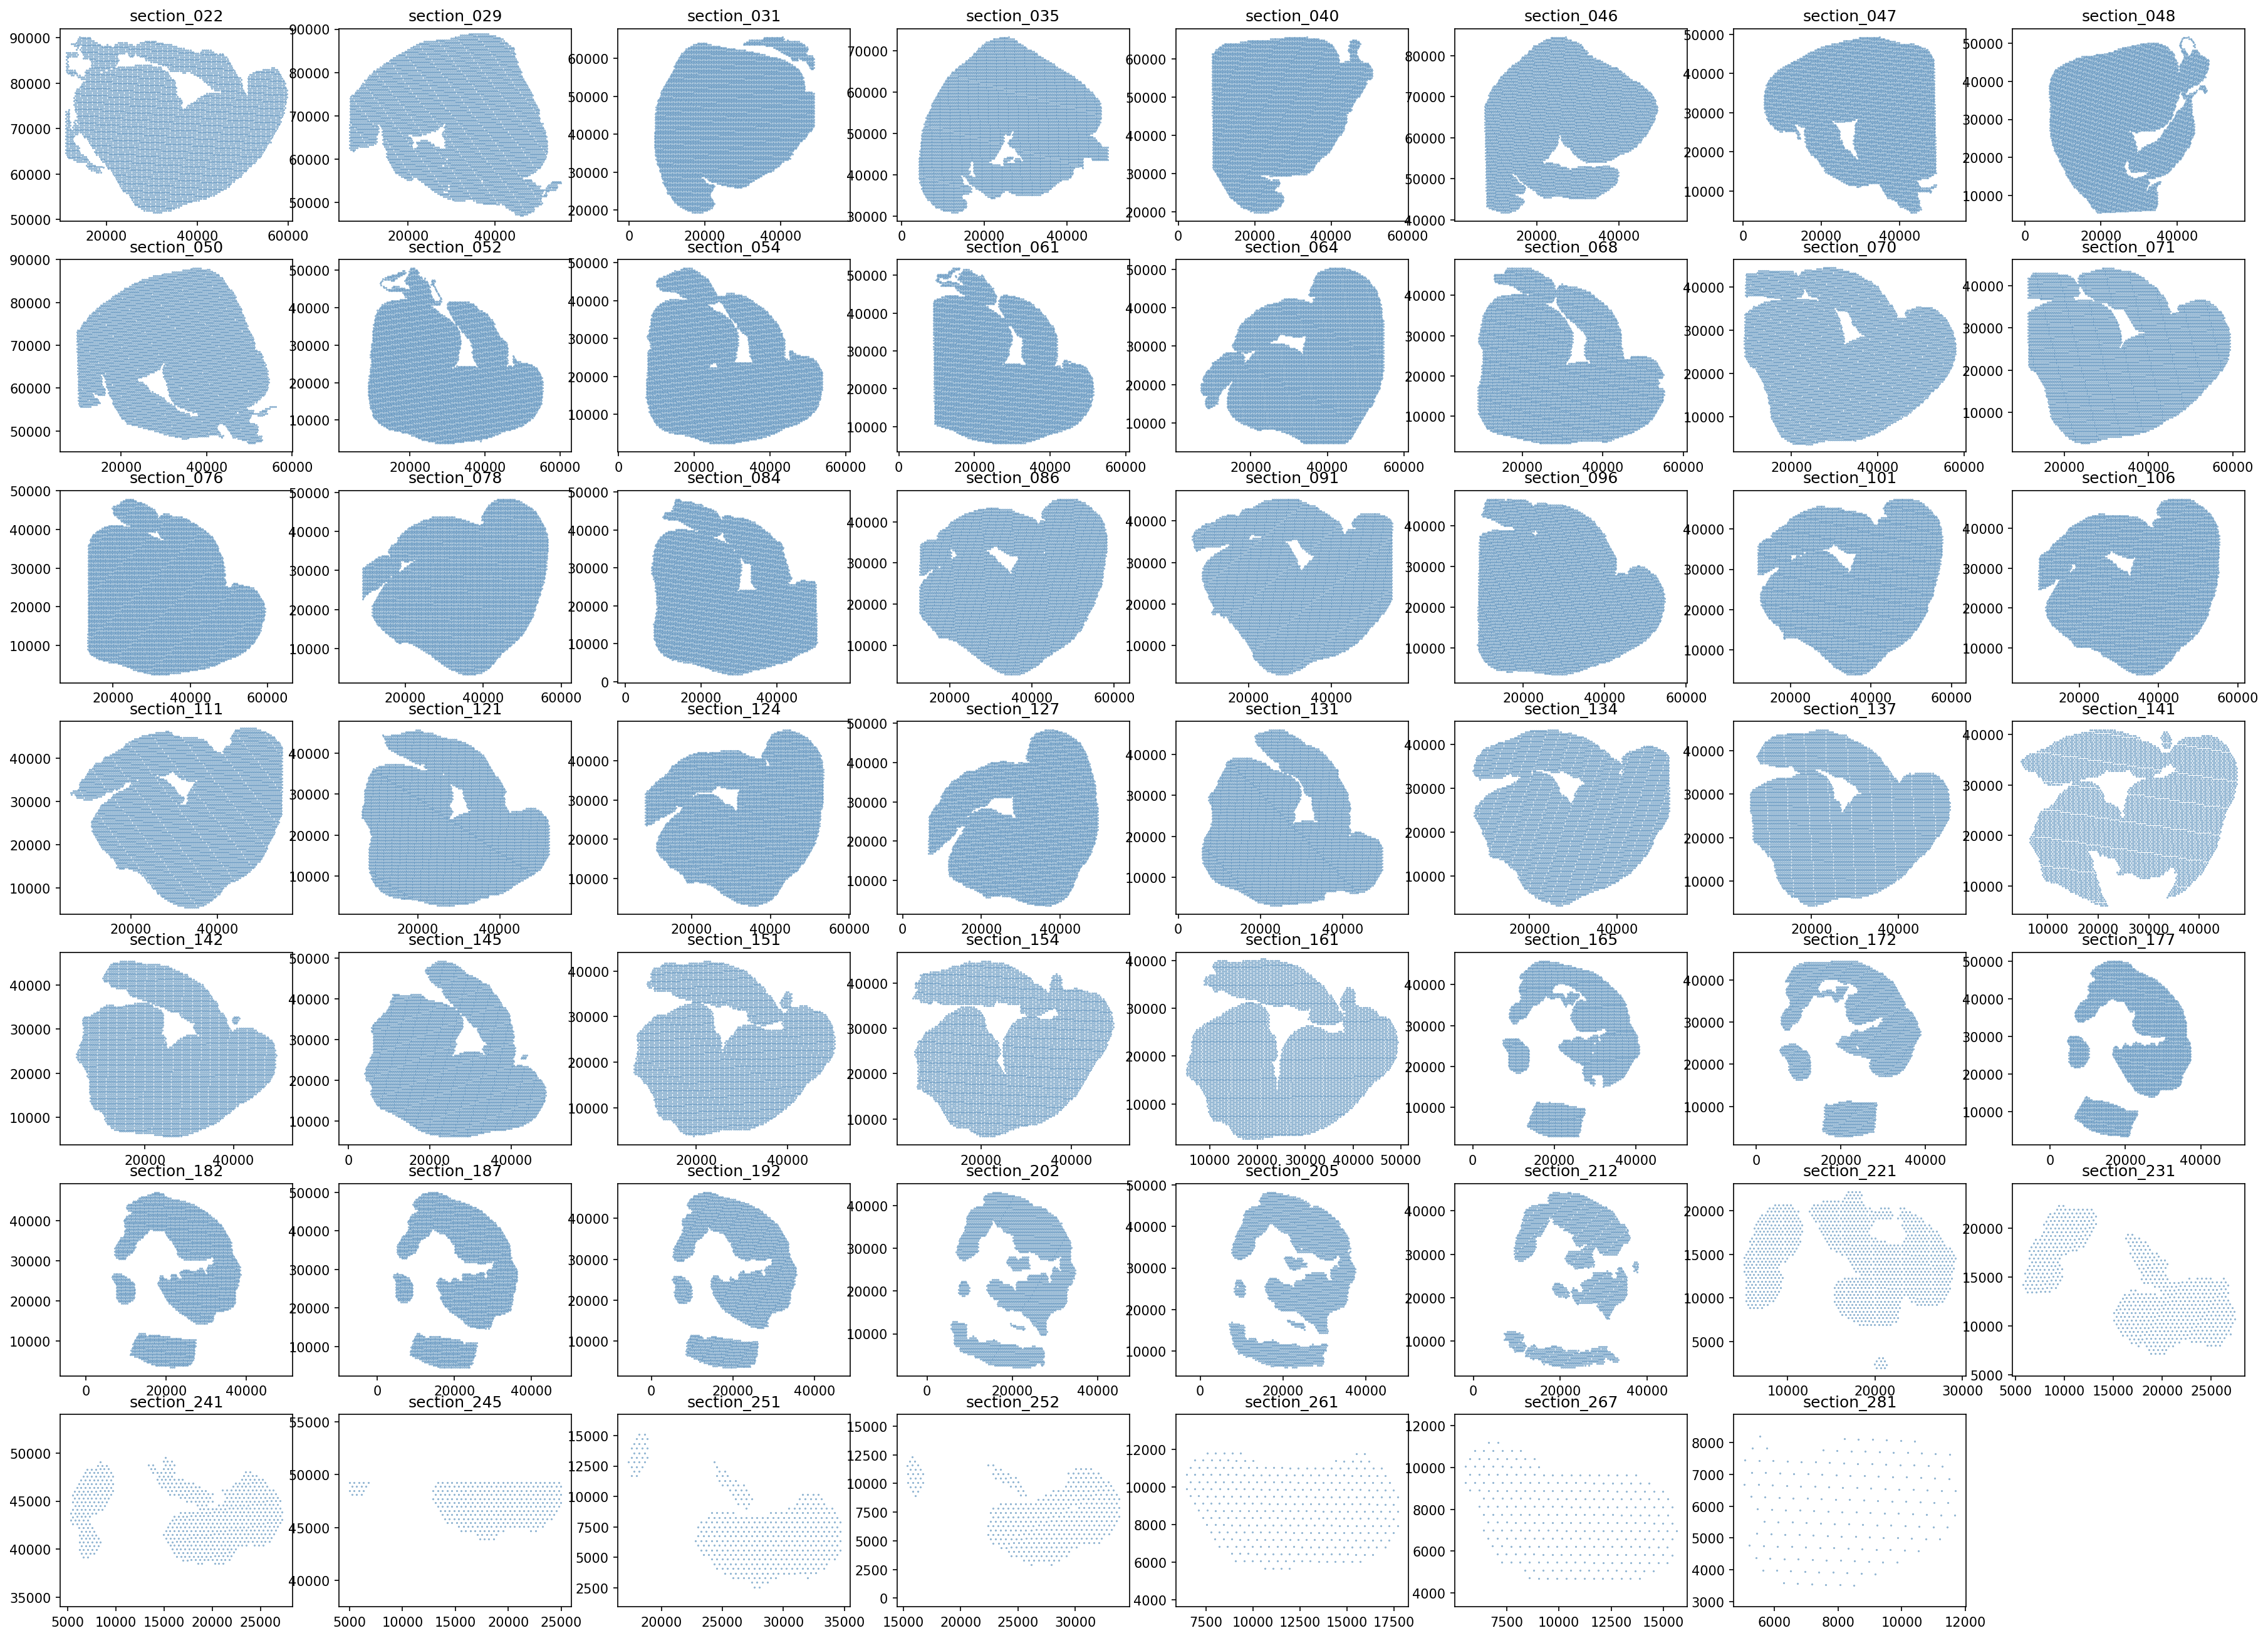

In [17]:
plt.figure(figsize=(30,25), dpi=150)
counts_matrices = dict()
coords = dict()
for i,sample in enumerate(adata.obs['sample'].unique()):  
    plt.subplot(8,7,i+1)
    plt.scatter(adata.obsm['spatial'][adata.obs['sample']==sample,0], adata.obsm['spatial'][adata.obs['sample']==sample,1], c='steelblue', s=0.1);
    plt.axis('equal')
    plt.title(sample)
    #plt.gca().invert_yaxis()
    #plt.title(useful_names[i], fontdict = {'fontsize' : 15})
    #plt.tight_layout()
plt.show()

In [18]:
cord_section_165 = adata.obs.index[(adata.obs['sample']=='section_165') & 
                    ((adata.obsm['spatial'][:,1]<13000) | #cord
                    ((adata.obsm['spatial'][:,0]<20000) & 
                    (adata.obsm['spatial'][:,1]<28000))) #liver
                   ]

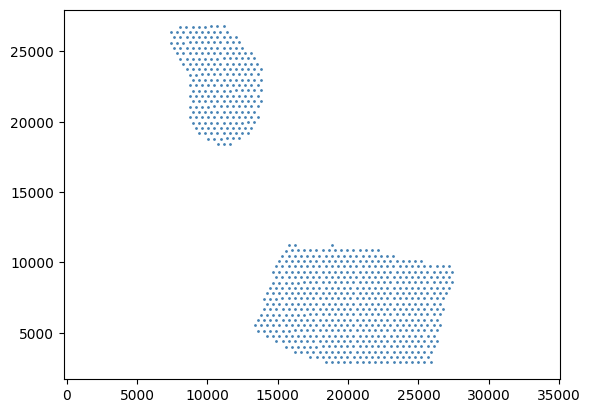

In [19]:
spots = cord_section_165
plt.scatter(adata.obsm['spatial'][adata.obs.index.isin(spots),0], adata.obsm['spatial'][adata.obs.index.isin(spots),1], c='steelblue', s=1);
plt.axis('equal')
plt.show()

In [20]:
cord_section_172 = adata.obs.index[(adata.obs['sample']=='section_172') & 
                                   ((adata.obsm['spatial'][:,1]<13000) | #cord
                    ((adata.obsm['spatial'][:,0]<15000) & 
                    (adata.obsm['spatial'][:,1]<28000))) #liver
                   ]

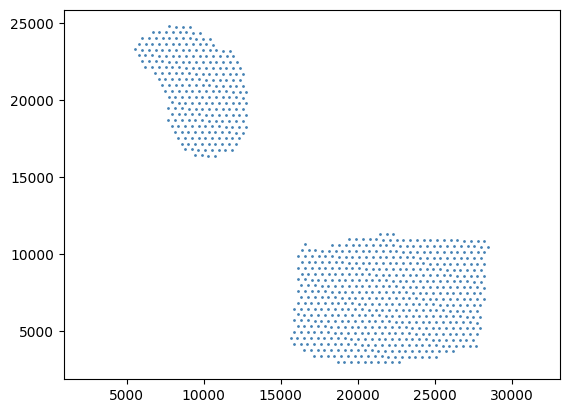

In [21]:
spots = cord_section_172
plt.scatter(adata.obsm['spatial'][adata.obs.index.isin(spots),0], adata.obsm['spatial'][adata.obs.index.isin(spots),1], c='steelblue', s=1);
plt.axis('equal')
plt.show()

In [22]:
cord_section_177 = adata.obs.index[(adata.obs['sample']=='section_177') & 
                                   ((adata.obsm['spatial'][:,1]<14060) | #cord
                    ((adata.obsm['spatial'][:,0]<15000) & 
                    (adata.obsm['spatial'][:,1]<31500))) #liver
                   ]

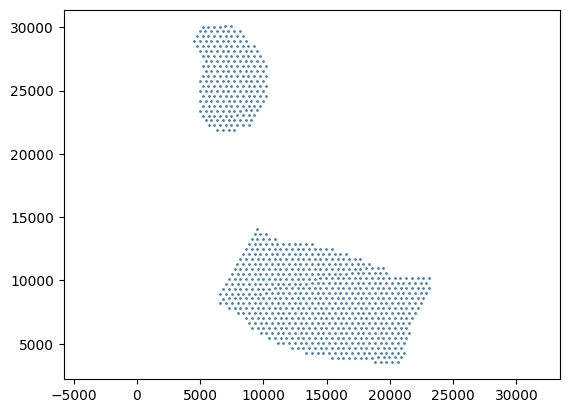

In [23]:
spots = cord_section_177
plt.scatter(adata.obsm['spatial'][adata.obs.index.isin(spots),0], adata.obsm['spatial'][adata.obs.index.isin(spots),1], c='steelblue', s=1);
plt.axis('equal')
plt.show()

In [24]:
cord_section_182 = adata.obs.index[(adata.obs['sample']=='section_182') & 
                                   ((adata.obsm['spatial'][:,1]<13000) | #cord
                    ((adata.obsm['spatial'][:,0]<15000) & 
                    (adata.obsm['spatial'][:,1]<30400))) #liver
                   ]

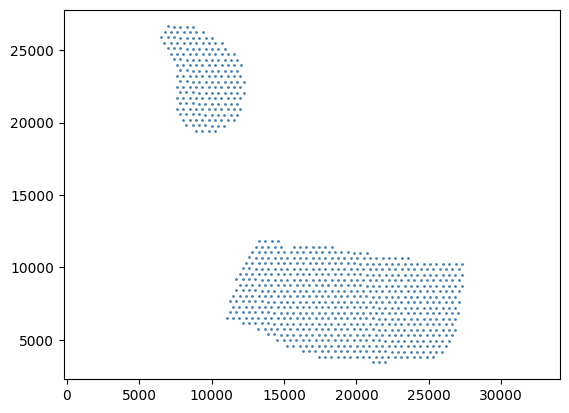

In [25]:
spots = cord_section_182
plt.scatter(adata.obsm['spatial'][adata.obs.index.isin(spots),0], adata.obsm['spatial'][adata.obs.index.isin(spots),1], c='steelblue', s=1);
plt.axis('equal')
plt.show()

In [26]:
cord_section_187 = adata.obs.index[(adata.obs['sample']=='section_187') & 
                                   ((adata.obsm['spatial'][:,1]<14500) | #cord
                    ((adata.obsm['spatial'][:,0]<15000) & 
                    (adata.obsm['spatial'][:,1]<30900))) #liver
                   ]

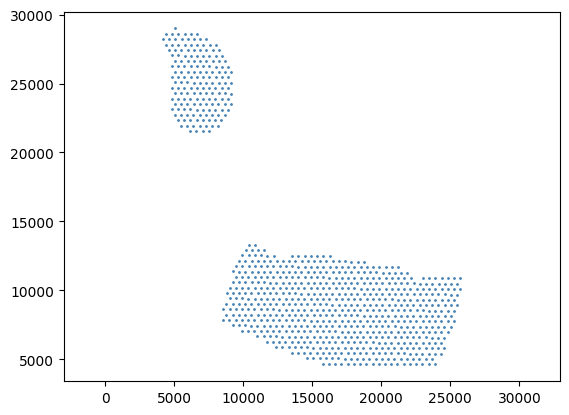

In [27]:
spots = cord_section_187
plt.scatter(adata.obsm['spatial'][adata.obs.index.isin(spots),0], adata.obsm['spatial'][adata.obs.index.isin(spots),1], c='steelblue', s=1);
plt.axis('equal')
plt.show()

In [28]:
cord_section_192 = adata.obs.index[(adata.obs['sample']=='section_192') & 
                                   ((adata.obsm['spatial'][:,1]<13000) | #cord
                    ((adata.obsm['spatial'][:,0]<14000) & 
                    (adata.obsm['spatial'][:,1]<27000))) #liver
                   ]

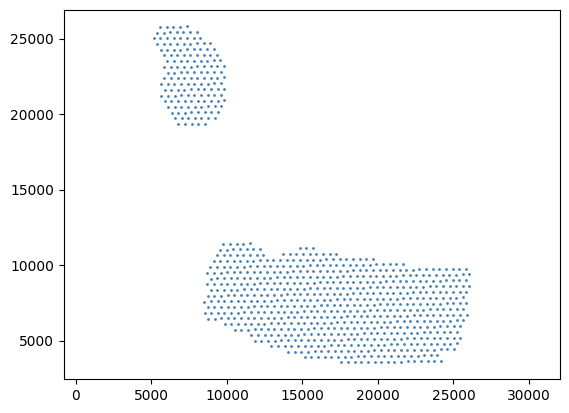

In [29]:
spots = cord_section_192
plt.scatter(adata.obsm['spatial'][adata.obs.index.isin(spots),0], adata.obsm['spatial'][adata.obs.index.isin(spots),1], c='steelblue', s=1);
plt.axis('equal')
plt.show()

In [30]:
cord_section_202 = adata.obs.index[(adata.obs['sample']=='section_202') & 
                                   (
                                       (((adata.obsm['spatial'][:,1]<7500) & (adata.obsm['spatial'][:,0]>=19000)) | 
                                    ((adata.obsm['spatial'][:,1]<13000) & (adata.obsm['spatial'][:,0]<19000))) #cord
                                       |
                    (((adata.obsm['spatial'][:,0]<14000) & 
                    (adata.obsm['spatial'][:,1]<23000)))#liver
                                   ) 
                                  ]

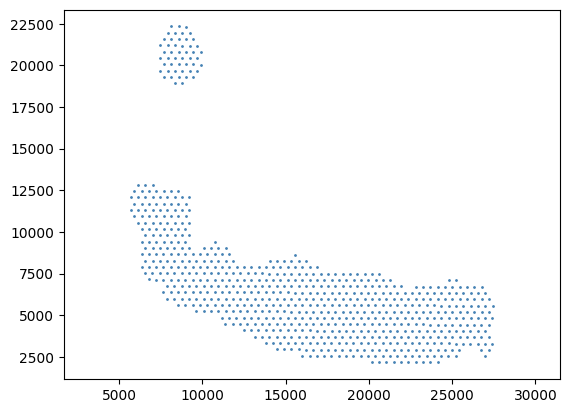

In [31]:
spots = cord_section_202
plt.scatter(adata.obsm['spatial'][adata.obs.index.isin(spots),0], adata.obsm['spatial'][adata.obs.index.isin(spots),1], c='steelblue', s=1);
plt.axis('equal')
plt.show()

In [32]:
cord_section_205 = adata.obs.index[(adata.obs['sample']=='section_205') & 
                                   (
                                       (((adata.obsm['spatial'][:,1]<13000) & (adata.obsm['spatial'][:,0]>=20000)) | 
                                    ((adata.obsm['spatial'][:,1]<18000) & (adata.obsm['spatial'][:,0]<20000))) #cord
                                       |
                    (((adata.obsm['spatial'][:,0]<14000) & 
                    (adata.obsm['spatial'][:,1]<30000)))#liver
                                   ) 
                                  ]

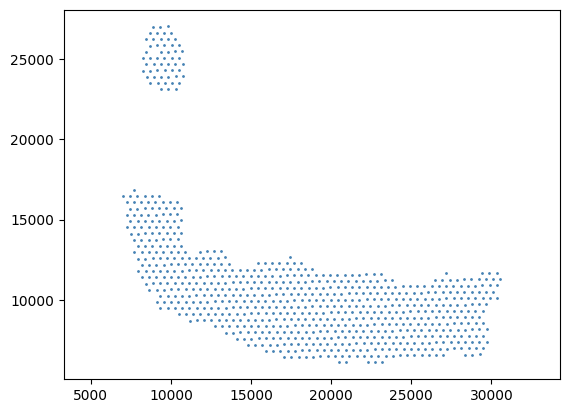

In [33]:
spots = cord_section_205
plt.scatter(adata.obsm['spatial'][adata.obs.index.isin(spots),0], adata.obsm['spatial'][adata.obs.index.isin(spots),1], c='steelblue', s=1);
plt.axis('equal')
plt.show()

In [34]:
cord_section_212 = adata.obs.index[(adata.obs['sample']=='section_212') & (adata.obsm['spatial'][:,1]<15000)]

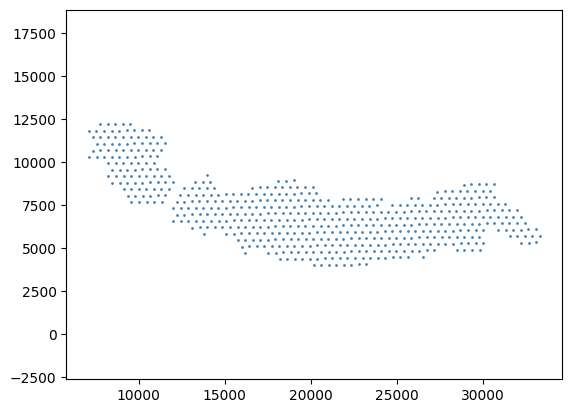

In [35]:
spots = cord_section_212
plt.scatter(adata.obsm['spatial'][adata.obs.index.isin(spots),0], adata.obsm['spatial'][adata.obs.index.isin(spots),1], c='steelblue', s=1);
plt.axis('equal')
plt.show()

In [36]:
adata_nocord = adata[~adata.obs.index.isin(cord_section_165.tolist() + 
                                           cord_section_172.tolist() +
                                           cord_section_177.tolist() +
                                           cord_section_182.tolist() +
                                           cord_section_187.tolist() +
                                           cord_section_192.tolist() +
                                           cord_section_202.tolist() +
                                           cord_section_205.tolist() +
                                           cord_section_212.tolist()),:]

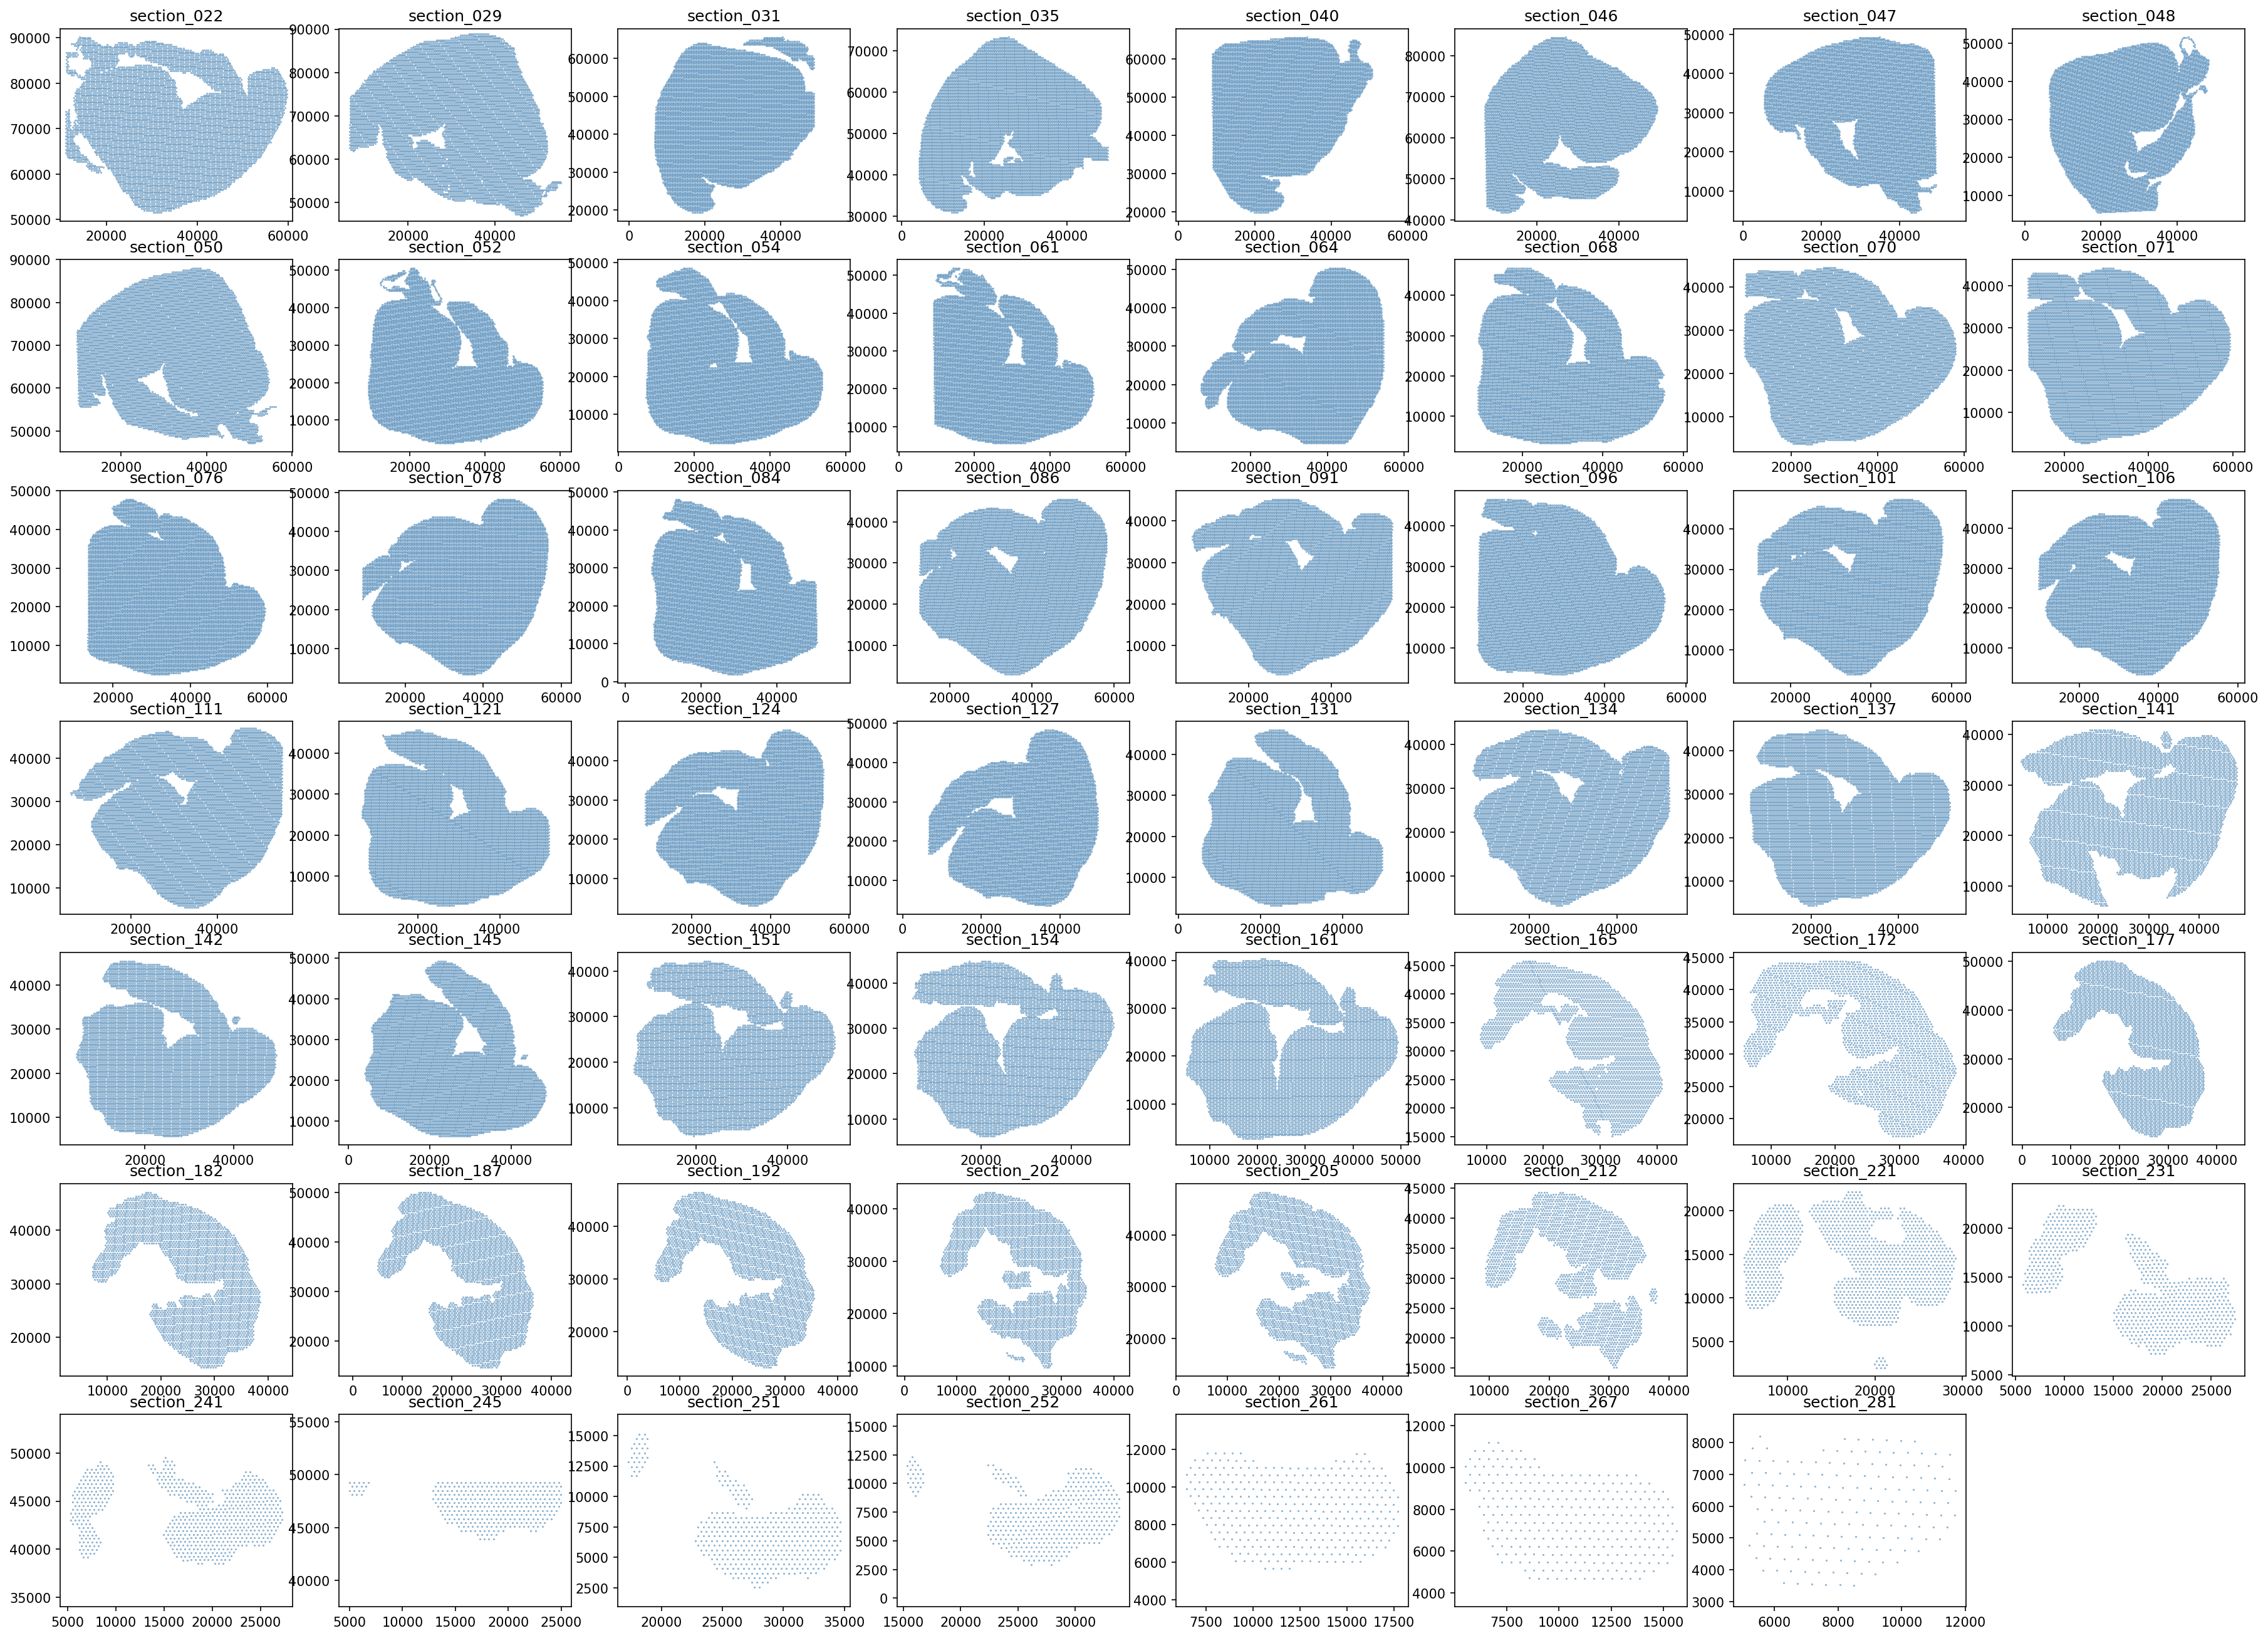

In [41]:
plt.figure(figsize=(30,25), dpi=150)
counts_matrices = dict()
coords = dict()
for i,sample in enumerate(adata_nocord.obs['sample'].unique()):  
    plt.subplot(8,8,i+1)
    plt.scatter(adata_nocord.obsm['spatial'][adata_nocord.obs['sample']==sample,0], adata_nocord.obsm['spatial'][adata_nocord.obs['sample']==sample,1], c='steelblue', s=0.1);
    plt.axis('equal')
    plt.title(sample)
    #plt.gca().invert_yaxis()
    #plt.title(useful_names[i], fontdict = {'fontsize' : 15})
    #plt.tight_layout()
plt.show()

In [131]:
adata_nocord.write('/lustre/scratch126/cellgen/team283/yd2/whole_embryo/12052024_all_sections_no_cord_no_liver/adata_nocord_noliver.h5ad')

In [42]:
import pandas as pd
obj = pd.read_pickle('/lustre/scratch126/cellgen/team283/yd2/whole_embryo/12052024_all_sections_no_cord_no_liver/CS17_Moscot_all_sections_nocord_noliver_alpha_03.pkl')

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [46]:
obj.

AlignmentProblem[('section_145', 'section_151'), ('section_031', 'section_035'), ('section_101', 'section_106'), ('section_124', 'section_127'), ('section_071', 'section_076'), ('section_076', 'section_078'), ('section_054', 'section_061'), ('section_182', 'section_187'), ('section_151', 'section_154'), ('section_141', 'section_142'), ('section_154', 'section_161'), ('section_086', 'section_091'), ('section_078', 'section_084'), ('section_050', 'section_052'), ('section_121', 'section_124'), ('section_131', 'section_134'), ('section_231', 'section_241'), ('section_212', 'section_221'), ('section_267', 'section_281'), ('section_022', 'section_029'), ('section_137', 'section_141'), ('section_068', 'section_070'), ('section_172', 'section_177'), ('section_192', 'section_202'), ('section_177', 'section_182'), ('section_245', 'section_251'), ('section_046', 'section_047'), ('section_127', 'section_131'), ('section_040', 'section_046'), ('section_221', 'section_231'), ('section_251', 'sectio